# Exploratory Data Analysis (EDA) for Popular Actor Dataset

### 1. Load and Inspect Data

In [ ]:
import os
import sys
# Set the working directory to the project root
os.chdir("/Users/isaacgonzales/Desktop/Sample")
sys.path.append(os.path.abspath("src"))
from src.data_fetching import load_imdb_data  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load data
title_basics = load_imdb_data("title_basics")
title_principals = load_imdb_data("title_principals")
name_basics = load_imdb_data("name_basics")
title_ratings = load_imdb_data("title_ratings")

In [2]:
# Inspect and validate data types (1/2)
display(title_basics.info())
display(title_principals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11516411 entries, 0 to 11516410
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          string 
 1   titleType       string 
 2   primaryTitle    string 
 3   originalTitle   string 
 4   isAdult         boolean
 5   startYear       Int64  
 6   endYear         Int64  
 7   runtimeMinutes  Int64  
 8   genres          string 
dtypes: Int64(3), boolean(1), string(5)
memory usage: 757.8 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91381089 entries, 0 to 91381088
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      string
 1   ordering    Int64 
 2   nconst      string
 3   category    string
 4   job         string
 5   characters  string
dtypes: Int64(1), string(5)
memory usage: 4.2 GB


None

In [ ]:
# Inspect and validate data types (2/2)
display(name_basics.info())
display(title_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14248387 entries, 0 to 14248386
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             string
 1   primaryName        string
 2   birthYear          Int64 
 3   deathYear          Int64 
 4   primaryProfession  string
 5   knownForTitles     string
dtypes: Int64(2), string(4)
memory usage: 679.4 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544438 entries, 0 to 1544437
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1544438 non-null  string 
 1   averageRating  1544438 non-null  float64
 2   numVotes       1544438 non-null  Int64  
dtypes: Int64(1), float64(1), string(1)
memory usage: 36.8 MB


None

In [4]:
# List all job categories
list(title_principals['category'].unique())

['self',
 'director',
 'producer',
 'cinematographer',
 'composer',
 'writer',
 'editor',
 'actor',
 'actress',
 'production_designer',
 'archive_footage',
 'casting_director',
 'archive_sound']

### 2. Filter Data for 2020 Movies

In [5]:
# Filter the Movie type titles in year 2020
movies = title_basics[(title_basics["startYear"] == 2020) & (title_basics["titleType"].isin(["movie", "tvMovie"]))]

### 3. Identify Actors from Cast Data

In [6]:
# Join title_principals with "movies" to get cast members
casts = title_principals.merge(movies, on="tconst", how="inner")

# Filter only actors and actresses
casts= casts[casts["category"].isin(["actor", "actress"])]

# Merge the "casts" table with "name_basics" table to get actor names
actors = casts.merge(name_basics, on="nconst", how="inner")


In [7]:
display(actors.sort_values(["tconst","ordering"]).head(5))

,tconst,ordering,nconst,category,job,characters,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0062336,1,nm0815612,actor,<NA>,"[""Viudo""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,2020,<NA>,70,Drama,Rubén Sotoconil,1916,2002,actor,"tt0189469,tt0064147,tt0094084,tt0130375"
1,tt0062336,2,nm1860495,actress,<NA>,"[""Fantasma""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,2020,<NA>,70,Drama,Claudia Paz,1920,2015,actress,"tt1187044,tt0454087,tt7131488,tt29466927"
2,tt0062336,3,nm0016013,actor,<NA>,"[""Silva""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,2020,<NA>,70,Drama,Luis Alarcón,1929,2023,"actor,special_effects,producer","tt0379108,tt0242198,tt1947646,tt3234226"
3,tt0062336,4,nm0739834,actress,<NA>,"[""Lola""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,2020,<NA>,70,Drama,Shenda Román,1928,<NA>,actress,"tt2128535,tt3550512,tt0063718,tt0064147"
4,tt0062336,5,nm2065080,actor,<NA>,"[""Sobrino""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,2020,<NA>,70,Drama,Luis Vilches,<NA>,<NA>,actor,"tt0067475,tt0062336,tt0480613"


### 4. Define Popularity Metrics

In [8]:
# Merge with ratings to get movie popularity data
actors = actors.merge(title_ratings, on="tconst", how="left")
display(actors.sort_values(["tconst","ordering"]).head(5))

,tconst,ordering,nconst,category,job,characters,titleType,primaryTitle,originalTitle,isAdult,...,endYear,runtimeMinutes,genres,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,averageRating,numVotes
0,tt0062336,1,nm0815612,actor,<NA>,"[""Viudo""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,...,<NA>,70,Drama,Rubén Sotoconil,1916,2002,actor,"tt0189469,tt0064147,tt0094084,tt0130375",6.4,229
1,tt0062336,2,nm1860495,actress,<NA>,"[""Fantasma""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,...,<NA>,70,Drama,Claudia Paz,1920,2015,actress,"tt1187044,tt0454087,tt7131488,tt29466927",6.4,229
2,tt0062336,3,nm0016013,actor,<NA>,"[""Silva""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,...,<NA>,70,Drama,Luis Alarcón,1929,2023,"actor,special_effects,producer","tt0379108,tt0242198,tt1947646,tt3234226",6.4,229
3,tt0062336,4,nm0739834,actress,<NA>,"[""Lola""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,...,<NA>,70,Drama,Shenda Román,1928,<NA>,actress,"tt2128535,tt3550512,tt0063718,tt0064147",6.4,229
4,tt0062336,5,nm2065080,actor,<NA>,"[""Sobrino""]",movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,False,...,<NA>,70,Drama,Luis Vilches,<NA>,<NA>,actor,"tt0067475,tt0062336,tt0480613",6.4,229


The popularity score is computed using a weighted formula that balances three key factors:
- ***Number of appearances:*** How many movies an actor starred in during 2020.
- ***Average rating of their movies:*** The quality of movies they appeared in.
- ***Total votes on their movies:*** How many people engaged with their movies.

In [9]:
# Compute metrics
actor_counts = actors["nconst"].value_counts()
actor_avg_ratings = actors.groupby("nconst")["averageRating"].mean()
actor_total_votes = actors.groupby("nconst")["numVotes"].sum()

In [10]:
# Placeholder: Dictionary with genre counts (01_highest_rated_movie.ipynb)
genre_counts = {
    "Drama": 6,
    "Animation": 4,
    "Action": 2,
    "Biography": 2,
	"Fantasy": 2,
	"Adventure": 2,
	"Documentary": 1,
	"Comedy": 1,
	"Romance": 1,
	"Mystery": 1,
	"History": 1	
}
# Convert counts to probabilities (marginal distribution)
total_genres = sum(genre_counts.values())
genre_probabilities = {g: count / total_genres for g, count in genre_counts.items()}

# Assign genre weight directly
actors["genre_weight"] = actors["genres"].fillna("").str.split(",").apply(
    lambda x: sum(genre_probabilities.get(g, 0) for g in x)
)


### 5. Compute the Popularity Score

The **popularity score** is defined as:  
$$
\text{popularity\_score}_i = (0.4 \times \text{actor\_counts\_norm}_i) + (0.4 \times \text{actor\_total\_votes\_norm}_i) + (0.2 \times \text{genre\_weight}_i)
$$  

Where:  
- $ \text{actor\_counts\_norm}_i $ is the normalized count of movies for actor $ i $.  
- $ \text{actor\_total\_votes\_norm}_i $ is the normalized total votes for actor $ i $.  
- $ \text{genre\_weight}_i $ is the weighted sum of genre probabilities for actor $ i $.  


In [11]:
# Ensure genre_weight is also indexed by actor ID
genre_weight = actors.groupby("nconst")["genre_weight"].first()

# Normalize metrics
actor_counts_norm = actor_counts / actor_counts.max()
actor_total_votes_norm = actor_total_votes / actor_total_votes.max()

# Define weighted popularity score
popularity_score = (actor_counts_norm * 0.3) + (actor_total_votes_norm * 0.4) + (genre_weight * 0.3)


In [12]:
# Create final ranking
actor_popularity = pd.DataFrame({
    "Actor": popularity_score.index,  
    "Score": popularity_score.values,
    "Movies": actor_counts.loc[popularity_score.index].values,
    "Total Votes": actor_total_votes.loc[popularity_score.index].values,
    "Genre Weight": genre_weight.loc[popularity_score.index].values
}).sort_values(by="Score", ascending=False)

# Merge back actor names for readability
actor_popularity = actor_popularity.merge(name_basics[["nconst", "primaryName"]], 
                                          left_on="Actor", right_on="nconst", how="left")

# Reorder columns
actor_popularity = actor_popularity[["Actor", "primaryName", "Score", "Movies", "Total Votes", "Genre Weight"]]

### 6. Insights and Conclusion

In [13]:
# List the top 10 most popular actors
pd.set_option('display.float_format', '{:.2f}'.format)
display(actor_popularity.head(10))

,Actor,primaryName,Score,Movies,Total Votes,Genre Weight
0,nm0991553,Rich Ceraulo Ko,0.44,3,1255106,0.04
1,nm2993483,Simon Hill,0.37,36,750,0.22
2,nm0000616,Eric Roberts,0.29,27,6823,0.22
3,nm0582149,Chris Messina,0.29,5,440800,0.35
4,nm3916460,Okieriete Onaodowan,0.28,3,551746,0.26
5,nm0103797,Alice Braga,0.28,3,500753,0.30
6,nm0711118,Phylicia Rashad,0.27,4,461064,0.30
7,nm9898052,Kelsey Painter,0.27,26,403,0.17
8,nm0004937,Jamie Foxx,0.27,2,503995,0.30
9,nm0882616,Ivo Uukkivi,0.26,3,625047,0.13


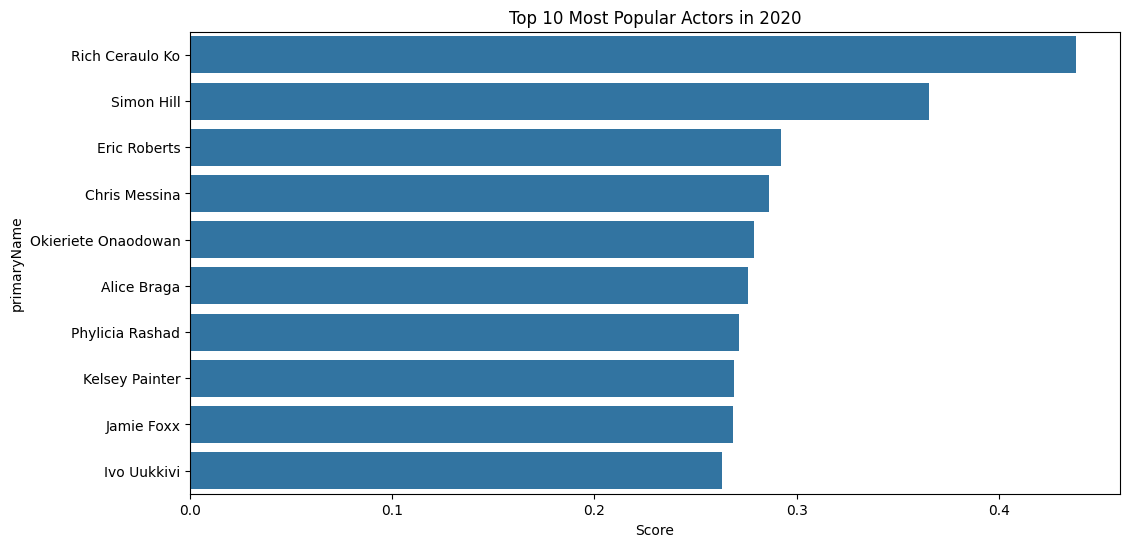

In [14]:
# Visualize
plt.figure(figsize=(12,6))
sns.barplot(x="Score", y="primaryName", data=actor_popularity.head(10))
plt.title("Top 10 Most Popular Actors in 2020")
plt.show()

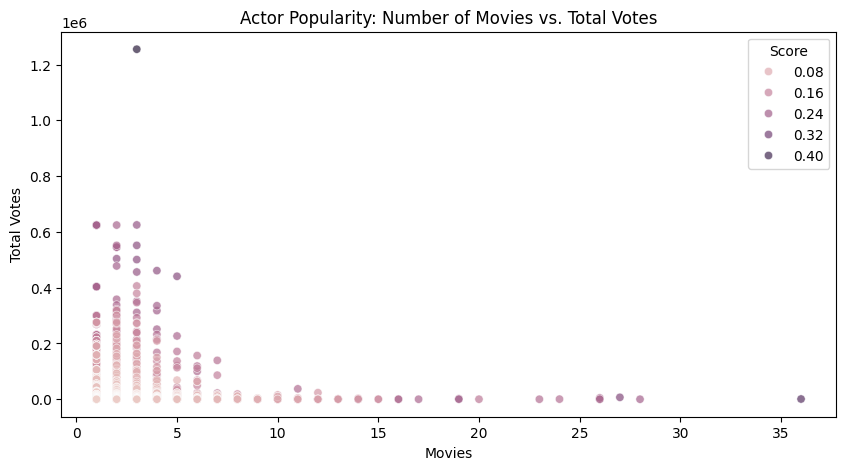

In [15]:
# Scatter plot: Movies vs. Total Votes
actor_popularity["Movies"] = actor_popularity["Movies"].astype("int64")
actor_popularity["Total Votes"] = actor_popularity["Total Votes"].astype("int64")
actor_popularity["Score"] = actor_popularity["Score"].astype("float64")

plt.figure(figsize=(10,5))
sns.scatterplot(x="Movies", y="Total Votes", hue="Score", data=actor_popularity, alpha=0.7)
plt.title("Actor Popularity: Number of Movies vs. Total Votes")
plt.show()

In [16]:
# Summary of findings
print("The most popular actor in 2020 based on our weighted score is:", actor_popularity.iloc[0]["primaryName"])

The most popular actor in 2020 based on our weighted score is: Rich Ceraulo Ko
